# CASE BASED MACHINE LEARNING

Muhammad Rieza Fachrezi

1301204335

IF-44-11

In [ ]:
#Import semua library yang dibutuhkan
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

## Data Preprocessing

### Input dataset

In [ ]:
#Input data audit_risk.csv dari GitHub
data_audit = pd.read_csv("https://raw.githubusercontent.com/riezaf51/data_audit/main/audit_risk.csv")
data_audit

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [ ]:
#Input data trial.csv dari GitHub
data_trial = pd.read_csv("https://raw.githubusercontent.com/riezaf51/data_audit/main/trial.csv")
data_trial

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


### Merging Dataset

Kita lakukan merging dari 2 dataset audit_risk.csv dan trial.csv. Karena terdapat kolom yang sama tetapi nama kolom di audit_risk dan trial berbeda cara penulisannya, kita ubah cara penulisan pada kolom trial menjadi sama seperti audit_risk

In [ ]:
data_trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial']

Score A dan B pada data trial adalah Score A dan B pada data audit_risk dibagi 10, kita bagi semua data pada kolom Score_A dan Score_B dengan 10

In [ ]:
#Membagi semua nilai pada kolom Score_A dan Score_B di data trial dengan 10
data_trial['Score_A'] = data_trial['Score_A']/10
data_trial['Score_B'] = data_trial['Score_B']/10

Kita langsung gabungkan audit_risk.csv dan trial.csv

In [ ]:
#Mencari semua kolom yang sama pada audit_risk dan trial
same_columns = np.intersect1d(data_audit.columns, data_trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [ ]:
#Penggabungan dataset audit_risk dan trial
merged_data = pd.merge(data_audit,data_trial, how='outer', on = same_columns.tolist())
merged_data

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1,2,2,2,0,2,2,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,2,2,2,0,2,2,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,2,2,2,0,2,2,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1,6,6,2,0,2,2,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,2,2,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,55.57,18,0.75,0.2,0.150,0.45,0.2,0.090,1.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.640,0.4,0.5,0.3280,0,2,2,2,0,2,2,0
806,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0,2,2,2,0,2,2,0
807,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0,2,2,2,0,2,2,0
808,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0,2,2,2,0,2,2,0


Kita pindahkan kolom Risk ke kolom akhir

In [ ]:
#Pop kolom Risk
pindah_kolom = merged_data.pop("Risk")
#Masukkan kolom Risk ke akhir data
merged_data.insert(len(merged_data.columns), "Risk", pindah_kolom)

### Data cleaning

In [ ]:
#Deskripsi dataset audit_risk
merged_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial,Risk
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,809.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.0,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,21.406716,2.348556,0.344938,1.294561,10.347643,0.308395,6.068334,12.665829,5.064815,0.222716,1.146543,13.543466,0.287160,7.918490,2.493827,0.205926,0.516049,0.100000,0.216049,0.051358,2.674074,16.999643,0.567407,0.5,6.881682,2.227160,2.871605,2.493827,0.028395,2.059259,2.160494,0.602469,0.379012
std,24.760476,5.579501,0.173042,3.378180,49.067564,0.167741,29.461510,50.292444,0.259188,0.078789,0.526897,65.251851,0.157414,39.157042,1.219166,0.036732,0.287118,0.520174,0.066628,0.299533,0.851869,53.676423,0.437573,0.0,37.871031,0.787889,1.574145,1.219166,0.180464,0.367323,0.666277,0.489690,0.485441
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,2.370000,0.070000,0.200000,0.014000,0.000000,0.200000,0.000000,0.430000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.564500,0.400000,0.5,0.312900,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,3.890000,0.820000,0.200000,0.164000,0.335000,0.200000,0.067000,1.290000,5.000000,0.200000,1.000000,0.050000,0.200000,0.010000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.116000,0.400000,0.5,0.470800,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000,0.000000
75%,55.570000,2.397500,0.600000,1.438500,2.985000,0.400000,1.347000,7.337500,5.000000,0.200000,1.000000,4.950000,0.200000,0.972500,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,9.210500,0.400000,0.5,2.882700,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000,1.000000


In [ ]:
#Tipe data pada dataset gabungan
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    810 non-null    float64
 1   LOCATION_ID     810 non-null    object 
 2   PARA_A          810 non-null    float64
 3   Score_A         810 non-null    float64
 4   Risk_A          810 non-null    float64
 5   PARA_B          810 non-null    float64
 6   Score_B         810 non-null    float64
 7   Risk_B          810 non-null    float64
 8   TOTAL           810 non-null    float64
 9   numbers         810 non-null    float64
 10  Score_B.1       810 non-null    float64
 11  Risk_C          810 non-null    float64
 12  Money_Value     809 non-null    float64
 13  Score_MV        810 non-null    float64
 14  Risk_D          810 non-null    float64
 15  District_Loss   810 non-null    int64  
 16  PROB            810 non-null    float64
 17  RiSk_E          810 non-null    flo

Karena terdapat 1 nilai null pada kolom Money_Value, kita isi dengan nilai median

In [ ]:
#Isi null dengan median
merged_data['Money_Value'] = merged_data['Money_Value'].fillna(merged_data['Money_Value'].median())

Kolom LOCATION_ID memiliki tipe data object sedangkan kebanyakan datanya numerik, maka terdapat data yang bukan numerik, kita hapus baris yang tidak memiliki data numerik

In [ ]:
merged_data['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
#Hapus data non numerik pada kolom LOCATION_ID
merged_data = merged_data[pd.to_numeric(merged_data['LOCATION_ID'], errors='coerce').notnull()]

In [ ]:
merged_data['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', '43', '44', '17'], dtype=object)

Kolom Detection_Risk memiliki nilai standar deviasi 0 sehingga kolom Detection_Risk bersifat homogen, maka kita eliminasi kolom itu

In [ ]:
#Hapus kolom Detection_Risk
merged_data = merged_data.drop(['Detection_Risk'],axis = 1)

Kolom Risk_Trial dari trial.csv dihapus karena redundan dengan kolom Risk dari audit_risk.csv

In [ ]:
merged_data = merged_data.drop(['Risk_trial'], axis = 1)

Kita hapus data duplikat dari dataset yang sudah kita gabungkan

In [ ]:
print("Jumlah baris sebelum penghapusan duplikat:",len(merged_data))
#Menghapus data duplikat
merged_data = merged_data.drop_duplicates(keep = 'first')
print("Jumlah baris setelah penghapusan duplikat:",len(merged_data))

Jumlah baris sebelum penghapusan duplikat: 807
Jumlah baris setelah penghapusan duplikat: 760


Kita akan mengkonversi semua tipe data dari dataset menjadi float agar terstandarisasi

In [ ]:
#Mengkonversi semua tipe data kolom menjadi float64
merged_data = merged_data.astype(float)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 809
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   Risk_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   Score_B        760 non-null    float64
 7   Risk_B         760 non-null    float64
 8   TOTAL          760 non-null    float64
 9   numbers        760 non-null    float64
 10  Score_B.1      760 non-null    float64
 11  Risk_C         760 non-null    float64
 12  Money_Value    760 non-null    float64
 13  Score_MV       760 non-null    float64
 14  Risk_D         760 non-null    float64
 15  District_Loss  760 non-null    float64
 16  PROB           760 non-null    float64
 17  RiSk_E         760 non-null    float64
 18  History   

Disini kita akan menampilkan correlation matrix dari dataset merged

In [ ]:
#Membuat correlation matrix
corr = merged_data.corr()
corr.style.background_gradient(cmap='RdBu_r')
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
corr.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk
Sector_score,1.00,-0.05,-0.21,-0.42,-0.22,-0.13,-0.21,-0.13,-0.15,-0.15,-0.17,-0.16,-0.12,-0.32,-0.11,-0.11,-0.09,-0.13,-0.11,-0.14,-0.10,-0.33,-0.17,-0.16,-0.09,-0.17,-0.32,-0.11,-0.08,-0.09,-0.14,-0.39
LOCATION_ID,-0.05,1.00,-0.01,0.08,-0.00,0.01,0.13,0.01,0.01,0.01,-0.02,-0.02,-0.07,0.11,-0.07,-0.11,-0.00,-0.10,-0.08,-0.05,-0.09,0.09,-0.05,-0.12,-0.09,-0.02,0.11,-0.11,0.01,-0.00,-0.05,0.06
PARA_A,-0.21,-0.01,1.00,0.49,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.28,0.45,0.13,0.04,0.12,0.12,0.17,0.10,0.42,0.48,0.15,0.22,0.14,0.28,0.13,0.04,0.04,0.17,0.38
Score_A,-0.42,0.08,0.49,1.00,0.50,0.25,0.57,0.25,0.30,0.24,0.27,0.26,0.20,0.47,0.20,0.09,0.09,0.10,0.18,0.26,0.15,0.72,0.32,0.17,0.20,0.27,0.47,0.09,0.09,0.09,0.26,0.62
Risk_A,-0.22,-0.00,1.00,0.50,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.04,0.12,0.12,0.17,0.11,0.43,0.48,0.15,0.22,0.14,0.29,0.13,0.04,0.04,0.17,0.38
PARA_B,-0.13,0.01,0.16,0.25,0.16,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.20,0.40,0.65,0.19,0.89,0.23,0.31,0.08,0.04,0.04,0.32,0.26
Score_B,-0.21,0.13,0.36,0.57,0.36,0.35,1.00,0.35,0.38,0.28,0.31,0.30,0.20,0.56,0.20,-0.01,0.09,0.01,0.20,0.31,0.17,0.90,0.36,0.12,0.21,0.31,0.56,-0.01,0.10,0.09,0.31,0.63
Risk_B,-0.13,0.01,0.16,0.25,0.16,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.19,0.40,0.65,0.19,0.89,0.23,0.31,0.08,0.04,0.04,0.32,0.25
TOTAL,-0.15,0.01,0.27,0.30,0.27,0.99,0.38,0.99,1.00,0.22,0.24,0.23,0.17,0.34,0.17,0.09,0.05,0.09,0.21,0.33,0.20,0.43,0.69,0.20,0.89,0.24,0.34,0.09,0.05,0.05,0.33,0.29
numbers,-0.15,0.01,0.13,0.24,0.13,0.21,0.28,0.21,0.22,1.00,0.91,0.96,0.19,0.45,0.19,0.12,0.03,0.14,0.20,0.21,0.20,0.50,0.27,0.23,0.22,0.91,0.45,0.12,-0.00,0.03,0.21,0.31


Kita akan ambil upper triangle dari correlation matrix tersebut

In [ ]:
#Ambil segitiga atas dari correlation matrix
upper_tri = corr.abs().where(np.triu(np.ones(corr.abs().shape),k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Disini kita akan mencari nilai kolom yang memiliki korelasi lebih besar dari 0.95. Akan dioutputkan kolom-kolom yang akan kita hapus dari dataset

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.95)]
to_drop

['Risk_A',
 'Risk_B',
 'TOTAL',
 'Risk_C',
 'Risk_D',
 'Risk_F',
 'Marks',
 'MONEY_Marks',
 'District',
 'Loss',
 'LOSS_SCORE',
 'History_score']

Kita hapus kolom-kolom yang memiliki korelasi sangat tinggi

In [ ]:
merged_data = merged_data.drop(to_drop, axis=1)

Summary dari Dataset yang sudah kita lakukan preprocessing:

In [ ]:
merged_data.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,numbers,Score_B.1,Money_Value,Score_MV,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.791303,14.913158,2.499382,0.354474,11.026830,0.315526,5.069079,0.224211,14.415229,0.292895,2.510526,0.206316,0.520526,0.106579,0.217105,2.716842,18.021425,0.575263,7.311627,0.400000
std,24.154233,9.935912,5.728092,0.174474,50.584064,0.170780,0.267037,0.081120,67.231818,0.160867,1.233009,0.037890,0.291829,0.536380,0.068656,0.862102,55.263187,0.448001,39.060120,0.490221
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.200000,5.000000,0.200000,0.000000,0.200000,2.000000,0.200000,0.400000,0.000000,0.200000,2.000000,1.400000,0.400000,0.280000,0.000000
25%,2.370000,8.000000,0.257500,0.200000,0.000000,0.200000,5.000000,0.200000,0.000000,0.200000,2.000000,0.200000,0.400000,0.000000,0.200000,2.000000,1.594000,0.400000,0.318800,0.000000
50%,3.890000,13.000000,0.915000,0.200000,0.455000,0.200000,5.000000,0.200000,0.105000,0.200000,2.000000,0.200000,0.400000,0.000000,0.200000,2.400000,2.243000,0.400000,0.619400,0.000000
75%,55.570000,19.000000,2.525000,0.600000,4.482500,0.400000,5.000000,0.200000,6.030000,0.400000,2.000000,0.200000,0.400000,0.000000,0.200000,3.400000,11.064500,0.400000,3.469800,1.000000
max,59.850000,44.000000,85.000000,0.600000,1264.630000,0.600000,9.000000,0.600000,935.030000,0.600000,6.000000,0.600000,2.400000,9.000000,0.600000,5.200000,801.262000,5.800000,961.514400,1.000000


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 809
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   PARA_B         760 non-null    float64
 5   Score_B        760 non-null    float64
 6   numbers        760 non-null    float64
 7   Score_B.1      760 non-null    float64
 8   Money_Value    760 non-null    float64
 9   Score_MV       760 non-null    float64
 10  District_Loss  760 non-null    float64
 11  PROB           760 non-null    float64
 12  RiSk_E         760 non-null    float64
 13  History        760 non-null    float64
 14  Prob           760 non-null    float64
 15  Score          760 non-null    float64
 16  Inherent_Risk  760 non-null    float64
 17  CONTROL_RISK   760 non-null    float64
 18  Audit_Risk

## Model Training & Validation

In [ ]:
#Membuat dataset baru untuk klasifikasi dengan melakukan drop kolom Audit_Risk
class_data = merged_data.drop(['Audit_Risk'], axis = 1)

In [ ]:
#Membagi kolom atribut dan kolom label
X = class_data.iloc[:,:len(class_data.columns)-1]
y = class_data.iloc[:,-1]

In [ ]:
#Split data training dan data validasi ke rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

AxesSubplot(0.125,0.125;0.775x0.755)


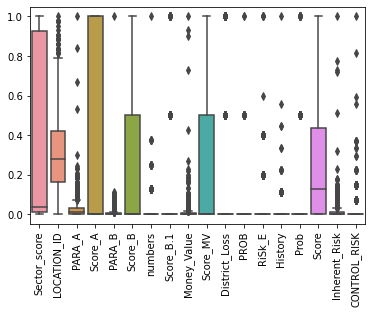

In [ ]:
X_boxplot = (X - X.min())/(X.max()-X.min()) #Normalisasi untuk visualisasi setiap kolom

#Membuat boxplot untuk visualisasi outlier
ax = sns.boxplot(data=X_boxplot)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print(ax)

Apabila kita lihat dari boxplot di atas, terdapat banyak outlier yang ada. Oleh karena itu, kita akan melakukan scaling menggunakan RobustScaler dari library sklearn.

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

Setelah itu kita masuk ke pembuatan ANN dan training model

In [ ]:
#Pembuatan ANN
model = Sequential()
model.add(Dense(20, input_shape = (X_train.shape[1],), activation = 'relu')) #Input layer dengan 20 neuron
model.add(Dense(10, activation = 'relu')) #Hidden layer dengan 10 neuron
model.add(Dense(1, activation = 'sigmoid')) #Output layer dengan 1 neuron

#Mengcompile model dengan perhitungan loss menggunakan binary_crossentropy dan optimizer adam(learning rate = 0.001)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#Melakukan training model sekaligus validasi
history = model.fit(X_train, y_train, epochs = 100, batch_size = 40, validation_data = (X_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 0.6074 - accuracy: 0.4490 - val_loss: 0.5758 - val_accuracy: 0.4671
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5478 - accuracy: 0.5312 - val_loss: 0.5353 - val_accuracy: 0.5987
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7122 - val_loss: 0.5078 - val_accuracy: 0.7237
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.8026 - val_loss: 0.4839 - val_accuracy: 0.8158
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4598 - accuracy: 0.8651 - val_loss: 0.4568 - val_accuracy: 0.8553
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.9079 - val_loss: 0.4236 - val_accuracy: 0.9079
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3921 - accuracy: 0.9359 - val_loss: 0.3863 - val_accuracy: 0.9276
Epoch 8/100


## Kesimpulan

Akan divisualisasikan grafik akurasi training dan validation pada setiap epoch

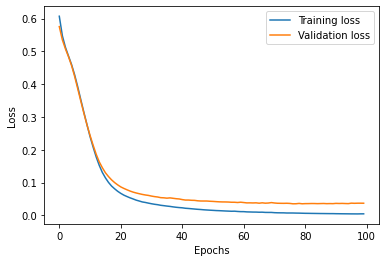

In [ ]:
#Visualisasi akurasi training dan validation
train_loss = history.history['loss'][:]
val_loss = history.history['val_loss'][:]
train_accu = history.history['accuracy'][:]
val_accu = history.history['val_accuracy'][:]
xc = range(len(train_accu))

#Grafik loss
fig1 = plt.figure()
fig1.patch.set_facecolor('white')
plt.plot(xc, train_loss, label='Training loss')
plt.plot(xc, val_loss, label='Validation loss')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
fig1.show()

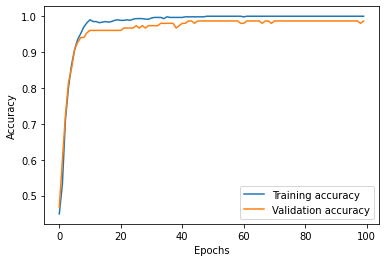

In [ ]:
#Grafik Akurasi
fig2 = plt.figure()
fig2.patch.set_facecolor('white')
plt.plot(xc, train_accu, label='Training accuracy')
plt.plot(xc, val_accu, label='Validation accuracy')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
fig2.show()

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = np.where(y_train_pred >= 0.5 , 1, 0)
y_test_pred = model.predict(X_test)
y_test_pred = np.where(y_test_pred >= 0.5 , 1, 0)
print("Akurasi prediksi data training:",accuracy_score(y_train, y_train_pred)*100,"%")
print("Akurasi prediksi data testing:", accuracy_score(y_test, y_test_pred)*100,"%")

5/5 [==============================] - 0s 3ms/step
Akurasi prediksi data training: 100.0 %
Akurasi prediksi data testing: 98.68421052631578 %


Didapat bahwa akurasi training pada epoch terakhir adalah 100% dengan akurasi validasinya dikisaran 98% - 99%. Grafik menunjukan kenaikkan yang sangat signifikan pada epoch 1-10. Setelahnya, kenaikkan grafik cenderung lambat tetapi akhirnya dapat tercapai akurasi 100% pada training.

Begitu juga untuk grafik loss, loss mengalami penurunan yang drastis pada epoch awal. Setelahnya, penurunan loss cenderung tidak terlalu signifikan.

Oleh karena itu, ANN yang telah terbuat bisa memprediksi data validasi secara akurat.